In [1]:
from sympy import * 
#自定义函数，获得一个函数的傅里叶展开式
#参数funs为待展开的函数，x为自变量,x_sections为自变量的区间，周期T的默认值为2*pi,展开项数默认为6
def series_fourier(funs,x,x_sections,T=2*pi,n=6):
    result='result:  '
    a=0
    for i in range(len(funs)):
        a+=2/T*integrate(funs[i],(x,x_sections[i],x_sections[i+1]))
    if a!=0:result+='['+str(a/2)+']+'
    for i in range(1,n+1):
        a=0
        b=0
        for j in range(len(funs)):
            a+=2/T*integrate(funs[j]*cos(2*pi/T*i*x),(x,x_sections[j],x_sections[j+1]))
            b+=2/T*integrate(funs[j]*sin(2*pi/T*i*x),(x,x_sections[j],x_sections[j+1]))
        if a!=0:result+='['+str(a)+'*cos({}{})'.format(2*pi/T*i,str(x) if T==2*pi else '*'+str(x))+']+'
        if b!=0:result+='['+str(b)+'*sin({}{})'.format(2*pi/T*i,str(x) if T==2*pi else '*'+str(x))+']+'
    result+='...'
    return result

In [2]:
#例12.20

In [3]:
x=Symbol('x')
funs=[-1,1]
x_sections=[-pi,0,pi]
series_fourier(funs,x,x_sections)

'result:  [4/pi*sin(1x)]+[4/(3*pi)*sin(3x)]+[4/(5*pi)*sin(5x)]+...'

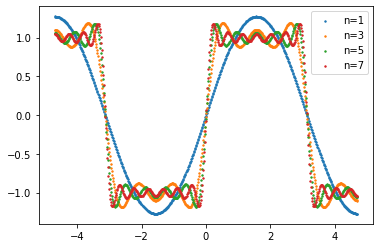

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#和函数
def S(x,n):return sum([4/np.pi*np.sin((2*k-1)*x)/(2*k-1) for k in range(1,n+1)])
x=np.linspace(-1.5*np.pi,1.5*np.pi,600)
#n=1,3,5,7
for n in range(1,8,2):
    plt.scatter(x,S(x,n),s=2,label='n={}'.format(n))
plt.legend()
plt.show()

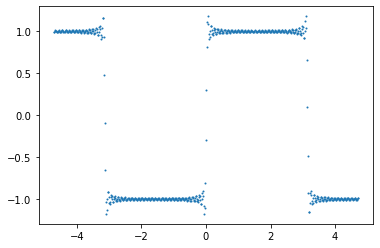

In [5]:
#n=30
plt.scatter(x,S(x,30),s=1)
plt.show()

In [6]:
#例12.21

In [7]:
x=Symbol('x')
funs=[x,0]
x_sections=[-pi,0,pi]
series_fourier(funs,x,x_sections)

'result:  [-pi/4]+[2/pi*cos(1x)]+[1*sin(1x)]+[-1/2*sin(2x)]+[2/(9*pi)*cos(3x)]+[1/3*sin(3x)]+[-1/4*sin(4x)]+[2/(25*pi)*cos(5x)]+[1/5*sin(5x)]+[-1/6*sin(6x)]+...'

In [8]:
#例12.22

In [9]:
t,E=symbols('t E')
funs=[-E*sin(t/2),E*sin(t/2)]
t_sections=[-pi,0,pi]
series_fourier(funs,t,t_sections)

'result:  [2*E/pi]+[-4*E/(3*pi)*cos(1t)]+[-4*E/(15*pi)*cos(2t)]+[-4*E/(35*pi)*cos(3t)]+[-4*E/(63*pi)*cos(4t)]+[-4*E/(99*pi)*cos(5t)]+[-4*E/(143*pi)*cos(6t)]+...'

In [10]:
#例12.23

In [11]:
x=Symbol('x')
funs=[x]
x_sections=[-pi,pi]
series_fourier(funs,x,x_sections)

'result:  [2*sin(1x)]+[-1*sin(2x)]+[2/3*sin(3x)]+[-1/2*sin(4x)]+[2/5*sin(5x)]+[-1/3*sin(6x)]+...'

In [12]:
#例12.24

In [13]:
x=Symbol('x')
funs=[-x,x]
x_sections=[-pi,0,pi]
series_fourier(funs,x,x_sections,n=8)

'result:  [pi/2]+[-4/pi*cos(1x)]+[-4/(9*pi)*cos(3x)]+[-4/(25*pi)*cos(5x)]+[-4/(49*pi)*cos(7x)]+...'

In [14]:
#例12.25

In [15]:
x=Symbol('x')
funs=[0,-cos(x),cos(x),0]
x_sections=[-pi,-pi/2,0,pi/2,pi]
series_fourier(funs,x,x_sections)

'result:  [1/pi*sin(1x)]+[4/(3*pi)*sin(2x)]+[1/pi*sin(3x)]+[8/(15*pi)*sin(4x)]+[1/(3*pi)*sin(5x)]+[12/(35*pi)*sin(6x)]+...'

In [16]:
x=Symbol('x')
funs=[0,cos(x),0]
x_sections=[-pi,-pi/2,pi/2,pi]
series_fourier(funs,x,x_sections)

'result:  [1/pi]+[1/2*cos(1x)]+[2/(3*pi)*cos(2x)]+[-2/(15*pi)*cos(4x)]+[2/(35*pi)*cos(6x)]+...'

In [17]:
#例12.26

In [18]:
x=Symbol('x')
h=Symbol('h',positive=True)
funs=[0,h]
x_sections=[-2,0,2]
series_fourier(funs,x,x_sections,T=4)

'result:  [0.5*h]+[2.0*h/pi*sin(pi/2*x)]+[0.666666666666667*h/pi*sin(3*pi/2*x)]+[0.4*h/pi*sin(5*pi/2*x)]+...'